In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import math
import datetime
from datetime import timedelta,date
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

from vmdpy import VMD

In [13]:
df_wind_raw = pd.read_csv("database//nasa_windspeed_dataset_2019_2022.csv", header = 13)

NASA/POWER CERES/MERRA2 Native Resolution Hourly Data 
- Dates (month/day/year): 01/01/2019 through 12/31/2022 
- Location: Latitude  -6.9726   Longitude -40.3438 
- Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 551.85 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 

Parameter(s): 
- WS50M           MERRA-2 Wind Speed at 50 Meters (m/s) 
- WD50M           MERRA-2 Wind Direction at 50 Meters (Degrees) 
- PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/hour) 
- T2M             MERRA-2 Temperature at 2 Meters (C) 
- QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg) 

In [16]:
#Creating a copy of the dataframe to manipulate
df_wind = df_wind_raw.copy()
df_wind.columns = df_wind.columns.str.lower()
df_wind.columns

Index(['year', 'mo', 'dy', 'hr', 'ws50m', 'wd50m', 'prectotcorr', 't2m',
       'qv2m'],
      dtype='object')

In [28]:
#renaming column names
df_wind.rename(columns = {'mo': 'month' , 
                          'dy':'day', 
                          'hr':'hour',
                          'ws50m':'ws50',
                          'wd50m': 'wd50',
                          'prectotcorr': 'precipitation',
                          't2m':'ground_temp',
                          'qv2m':'humidity'}, inplace = True)

#adjusting the datetime values into one column and removing the non necessary ones
df_wind['datetime'] = pd.to_datetime(df_wind[['year','month','day','hour']])
df_wind.drop(columns = ['year','month','day','hour'], inplace = True)

In [34]:
df_wind.head()

,ws50m,wd50m,prectotcorr,t2m,qv2m,datetime
0,3.98,70.64,0.0,25.40,12.94,2018-12-31 21:00:00
1,4.05,70.97,0.0,24.71,12.82,2018-12-31 22:00:00
2,5.46,73.38,0.0,24.05,12.63,2018-12-31 23:00:00
3,7.12,73.16,0.0,24.07,12.63,2019-01-01 00:00:00
4,7.55,72.84,0.0,23.62,13.18,2019-01-01 01:00:00


In [41]:
df_wind.isnull().sum()

ws50m          0
wd50m          0
prectotcorr    0
t2m            0
qv2m           0
datetime       0
dtype: int64

<Axes: >

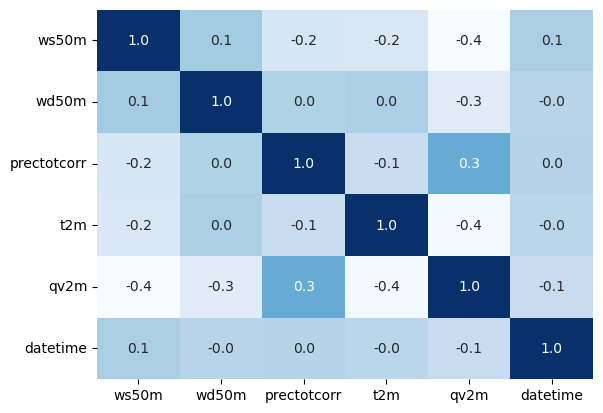

In [40]:
sns.heatmap(df_wind.corr(), annot=True, cbar=False, cmap='Blues', fmt='.1f')

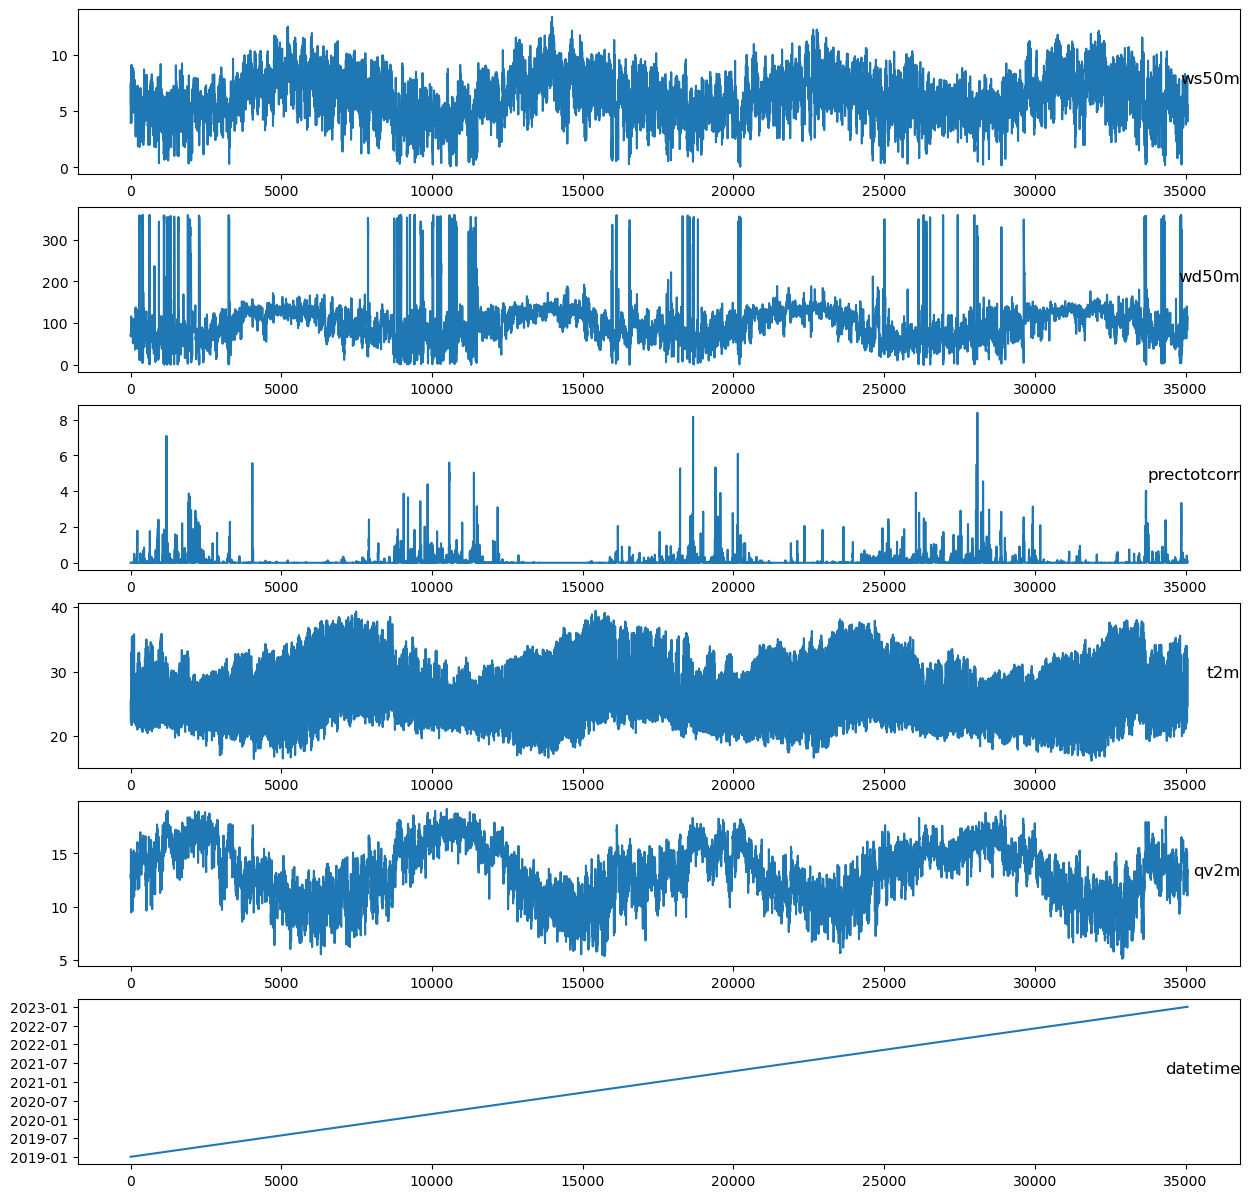

In [39]:
# specify columns to plot
groups = list(range(len(df_wind.columns)))
i = 1
# plot each column
plt.figure(figsize=(15,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df_wind.values[:, group])
    plt.title(df_wind.columns[group], y=0.5, loc='right')
    i += 1
plt.show()